In [1]:
import pandas as pd
import sklearn
import seaborn
from matplotlib import pyplot as plt
import unicodedata

In [2]:
df = pd.read_csv('../data/faixa_et_mortes.csv')
df = df.loc[:,['NomeDoMunicipio', 'NomeDoEstado', 'Tamanho do grupo de risco']]

df = df.rename(columns={'NomeDoMunicipio':'CityName', 'NomeDoEstado':'RegionName'})

df_idhm = pd.read_csv('../data/df_dados_integrados.csv')
df_idhm = df_idhm.loc[:,['CityName', 'RegionName', 'idhmr']]

df_idhm = df_idhm.groupby(['CityName', 'RegionName']).first().reset_index()

In [3]:
def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

def normalize_row(row):
    row['CityName'] = strip_accents(row['CityName'])
    row['RegionName'] = strip_accents(row['RegionName'])
    return row

df = df.apply(lambda row: normalize_row(row), axis=1)

In [4]:
df = df.merge(
    how='left',
    on=['CityName', 'RegionName'],
    right=df_idhm
)

In [5]:
df['Tamanho do grupo de risco'] = df['Tamanho do grupo de risco']/100
df

,CityName,RegionName,Tamanho do grupo de risco,idhmr
0,Ji-Parana,Rondonia,0.444985,0.728
1,Porto Velho,Rondonia,0.405856,0.764
2,Cruzeiro do Sul,Acre,0.328633,0.648
3,Rio Branco,Acre,0.379345,0.729
4,Manaus,Amazonas,0.393582,0.738
5,Parintins,Amazonas,0.331536,0.589
6,Boa Vista,Roraima,0.372003,0.737
7,Rorainopolis,Roraima,0.351699,0.574
8,Ananindeua,Para,0.439185,0.684
9,Belem,Para,0.484213,0.751


# KMeans

In [6]:
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
df.columns

Index(['CityName', 'RegionName', 'Tamanho do grupo de risco', 'idhmr'], dtype='object')

In [7]:
x = df.loc[:,['Tamanho do grupo de risco', 'idhmr']]

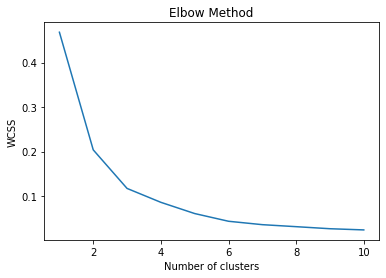

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

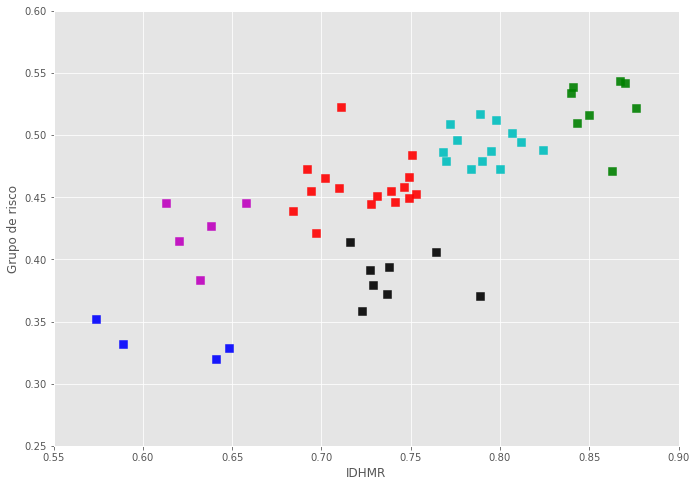

In [9]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=777)
kmeans.fit(x)
x['kmeans'] = kmeans.labels_

plt.style.use('ggplot')

w = 8
fig, ax = plt.subplots(figsize=(w * 1.4, w))

color_pers=['red', 'green','blue','m','c','black']

ax.scatter(x=x[x['kmeans'] == 1-1]['idhmr'], y=x[x['kmeans'] == 1-1]['Tamanho do grupo de risco'], s=80, alpha=0.9, marker='s', c=color_pers[1-1])
ax.scatter(x=x[x['kmeans'] == 2-1]['idhmr'], y=x[x['kmeans'] == 2-1]['Tamanho do grupo de risco'], s=80, alpha=0.9, marker='s', c=color_pers[2-1])
ax.scatter(x=x[x['kmeans'] == 3-1]['idhmr'], y=x[x['kmeans'] == 3-1]['Tamanho do grupo de risco'], s=80, alpha=0.9, marker='s', c=color_pers[3-1])
ax.scatter(x=x[x['kmeans'] == 4-1]['idhmr'], y=x[x['kmeans'] == 4-1]['Tamanho do grupo de risco'], s=80, alpha=0.9, marker='s', c=color_pers[4-1])
ax.scatter(x=x[x['kmeans'] == 5-1]['idhmr'], y=x[x['kmeans'] == 5-1]['Tamanho do grupo de risco'], s=80, alpha=0.9, marker='s', c=color_pers[5-1])
ax.scatter(x=x[x['kmeans'] == 6-1]['idhmr'], y=x[x['kmeans'] == 6-1]['Tamanho do grupo de risco'], s=80, alpha=0.9, marker='s', c=color_pers[6-1])

ax.set_xticks(np.arange(0.55, 0.95, 0.05), fontsize='large')
ax.set_yticks(np.arange(0.25, 0.65, 0.05), fontsize='large')
ax.set_xlabel('IDHMR', fontsize='large')
ax.set_ylabel('Grupo de risco', fontsize='large')
ax.grid(True)


plt.show()

In [10]:
df['kmeansGroup'] = x['kmeans']
df = df.sort_values(by='kmeansGroup')
df

,CityName,RegionName,Tamanho do grupo de risco,idhmr,kmeansGroup
0,Ji-Parana,Rondonia,0.444985,0.728,0
20,Fortaleza,Ceara,0.466681,0.749,0
25,Jaboatao dos Guararapes,Pernambuco,0.473143,0.692,0
18,Teresina,Piaui,0.450706,0.731,0
28,Maceio,Alagoas,0.455198,0.739,0
16,Sao Luis,Maranhao,0.446009,0.741,0
15,Imperatriz,Maranhao,0.421035,0.697,0
31,Feira de Santana,Bahia,0.457773,0.710,0
21,Mossoro,Rio Grande do Norte,0.454963,0.694,0
38,Sao Goncalo,Rio de Janeiro,0.522807,0.711,0


In [11]:
df_dadosintegrados = pd.read_csv('../data/df_dados_integrados.csv', low_memory=False)

In [12]:
df_dadosintegrados.drop(inplace=True, columns=['NewDeathsLag+35', 'ConfirmedDeathsLag+35', 'MortePonderadaP100kLag+35','MortePonderadaP100kMALag+35', 'NewDeathsLag+37',       'ConfirmedDeathsLag+37', 'MortePonderadaP100kLag+37',       'MortePonderadaP100kMALag+37', 'NewDeathsLag+5', 'ConfirmedDeathsLag+5',       'MortePonderadaP100kLag+5', 'MortePonderadaP100kMALag+5',       'NewDeathsLag+40', 'ConfirmedDeathsLag+40', 'MortePonderadaP100kLag+40',       'MortePonderadaP100kMALag+40', 'NewDeathsLag+10',       'ConfirmedDeathsLag+10', 'MortePonderadaP100kLag+10',       'MortePonderadaP100kMALag+10', 'NewDeathsLag+15',       'ConfirmedDeathsLag+15', 'MortePonderadaP100kLag+15',       'MortePonderadaP100kMALag+15', 'NewDeathsLag+50',       'ConfirmedDeathsLag+50', 'MortePonderadaP100kLag+50',       'MortePonderadaP100kMALag+50', 'NewDeathsLag+20',       'ConfirmedDeathsLag+20', 'MortePonderadaP100kLag+20'])
df_dadosintegrados.drop(inplace=True, columns=['MortePonderadaP100kMALag+20',       'NewDeathsLag+55', 'ConfirmedDeathsLag+55', 'MortePonderadaP100kLag+55',       'MortePonderadaP100kMALag+55', 'NewDeathsLag+120',       'ConfirmedDeathsLag+120', 'MortePonderadaP100kLag+120',       'MortePonderadaP100kMALag+120', 'NewDeathsLag+25',       'ConfirmedDeathsLag+25', 'MortePonderadaP100kLag+25',       'MortePonderadaP100kMALag+25', 'NewDeathsLag+90',       'ConfirmedDeathsLag+90', 'MortePonderadaP100kLag+90',       'MortePonderadaP100kMALag+90', 'NewDeathsLag+60',       'ConfirmedDeathsLag+60', 'MortePonderadaP100kLag+60',       'MortePonderadaP100kMALag+60', 'NewDeathsLag+30',       'ConfirmedDeathsLag+30', 'MortePonderadaP100kLag+30',       'MortePonderadaP100kMALag+30'])
df_dadosintegrados.drop(inplace=True, columns=['RegionName', 'idhmr'])


In [13]:
df_dadosintegrados.columns

Index(['CityName', 'RegionCode', 'FormattedDate', 'CityCode', 'Date',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'ConfirmedDeaths', 'StringencyIndex', 'NewDeaths', 'idhm', 'idhml',
       'idhme', 'ConfirmedCases', 'NewCases', 'TotalHabitantes',
       'Morte ponderada por 100 mil', 'MortePonderadaP100kMA',
       'NewDeathsLag+45', 'ConfirmedDeathsLag+45', 'MortePonderadaP100kLag+45',
       'MortePonderadaP100kMALag+45', 'NewCasesPonderado'],
      dtype='object')

In [14]:
df = df.merge(df_dadosintegrados, on='CityName')

In [15]:
df_ponderadoconfirmeddeaths = pd.read_csv('../data/df_dados_integrados_ponderadoconfirmeddeaths.csv', low_memory=False)
df_ponderadoconfirmeddeaths = df_ponderadoconfirmeddeaths[['CityName', 'FormattedDate','Morte ponderada por 100 mil']]

In [16]:
df_ponderadoconfirmeddeaths= df_ponderadoconfirmeddeaths.rename(columns={'Morte ponderada por 100 mil':'ConfirmedDeathsPonderado100k'})

In [17]:
df = df.merge(df_ponderadoconfirmeddeaths, on=['CityName', 'FormattedDate'])

In [18]:
#retirar março, começar em abril ()
df = df.loc[(df['FormattedDate'] >= '2020-04-01')]
df.columns

Index(['CityName', 'RegionName', 'Tamanho do grupo de risco', 'idhmr',
       'kmeansGroup', 'RegionCode', 'FormattedDate', 'CityCode', 'Date',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'ConfirmedDeaths', 'StringencyIndex', 'NewDeaths', 'idhm', 'idhml',
       'idhme', 'ConfirmedCases', 'NewCases', 'TotalHabitantes',
       'Morte ponderada por 100 mil', 'MortePonderadaP100kMA',
       'NewDeathsLag+45', 'ConfirmedDeathsLag+45', 'MortePonderadaP100kLag+45',
       'MortePonderadaP100kMALag+45', 'NewCasesPonderado',
       'ConfirmedDeathsPonderado100k'],
      dtype='object')

In [19]:
df = df[df['ConfirmedDeathsPonderado100k'] != 0]
df

,CityName,RegionName,Tamanho do grupo de risco,idhmr,kmeansGroup,RegionCode,FormattedDate,CityCode,Date,C1_School closing,...,NewCases,TotalHabitantes,Morte ponderada por 100 mil,MortePonderadaP100kMA,NewDeathsLag+45,ConfirmedDeathsLag+45,MortePonderadaP100kLag+45,MortePonderadaP100kMALag+45,NewCasesPonderado,ConfirmedDeathsPonderado100k
45,Ji-Parana,Rondonia,0.444985,0.728,0,BR_RO,2020-04-16,BR_1100122,20200416,3.0,...,3.0,130009,0.769185,0.109884,0.0,5.0,0.000000,5.494180e-02,2.307533,0.769185
46,Ji-Parana,Rondonia,0.444985,0.728,0,BR_RO,2020-04-17,BR_1100122,20200417,3.0,...,0.0,130009,0.000000,0.109884,NaN,NaN,0.000000,1.268826e-16,0.000000,0.769185
47,Ji-Parana,Rondonia,0.444985,0.728,0,BR_RO,2020-04-18,BR_1100122,20200418,3.0,...,0.0,130009,0.000000,0.109884,NaN,5.0,0.000000,1.268826e-16,0.000000,0.769185
48,Ji-Parana,Rondonia,0.444985,0.728,0,BR_RO,2020-04-19,BR_1100122,20200419,3.0,...,1.0,130009,0.000000,0.109884,0.0,5.0,0.000000,1.268826e-16,0.769178,0.769185
49,Ji-Parana,Rondonia,0.444985,0.728,0,BR_RO,2020-04-20,BR_1100122,20200420,3.0,...,0.0,130009,0.000000,0.109884,0.0,5.0,0.000000,1.268826e-16,0.000000,0.769185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,Aparecida de Goiania,Goias,0.413923,0.716,5,BR_GO,2020-10-29,BR_5201405,20201029,3.0,...,199.0,590146,-0.169451,0.133140,0.0,582.0,0.000000,4.841465e-02,33.720469,90.656439
13280,Aparecida de Goiania,Goias,0.413923,0.716,5,BR_GO,2020-10-30,BR_5201405,20201030,3.0,...,3.0,590146,0.169451,0.133140,1.0,583.0,0.169451,4.841465e-02,0.508349,90.825891
13281,Aparecida de Goiania,Goias,0.413923,0.716,5,BR_GO,2020-10-31,BR_5201405,20201031,3.0,...,20.0,590146,0.000000,0.157348,-4.0,579.0,-0.677805,3.631099e-02,3.388992,90.825891
13282,Aparecida de Goiania,Goias,0.413923,0.716,5,BR_GO,2020-11-01,BR_5201405,20201101,3.0,...,26.0,590146,0.000000,0.157348,2.0,581.0,0.338903,1.210366e-02,4.405689,90.825891


In [20]:
df0 = df.loc[df['kmeansGroup'] == 0]
df1 = df.loc[df['kmeansGroup'] == 1]
df2 = df.loc[df['kmeansGroup'] == 2]
df3 = df.loc[df['kmeansGroup'] == 3]
df4 = df.loc[df['kmeansGroup'] == 4]
df5 = df.loc[df['kmeansGroup'] == 5]

color = ['gray', 'indianred', 'maroon','peru','gold','olive','yellowgreen','lawngreen','turquoise','cyan','steelblue','rebeccapurple','purple','orchid','deeppink','slategray','navy']


Ji-Parana:indianred
Fortaleza:maroon
Jaboatao dos Guararapes:peru
Teresina:gold
Maceio:olive
Sao Luis:yellowgreen
Imperatriz:lawngreen
Feira de Santana:turquoise
Mossoro:cyan
Sao Goncalo:steelblue
Campina Grande:rebeccapurple
Ananindeua:purple
Guarulhos:orchid
Dourados:deeppink
Rondonopolis:slategray
Belem:navy


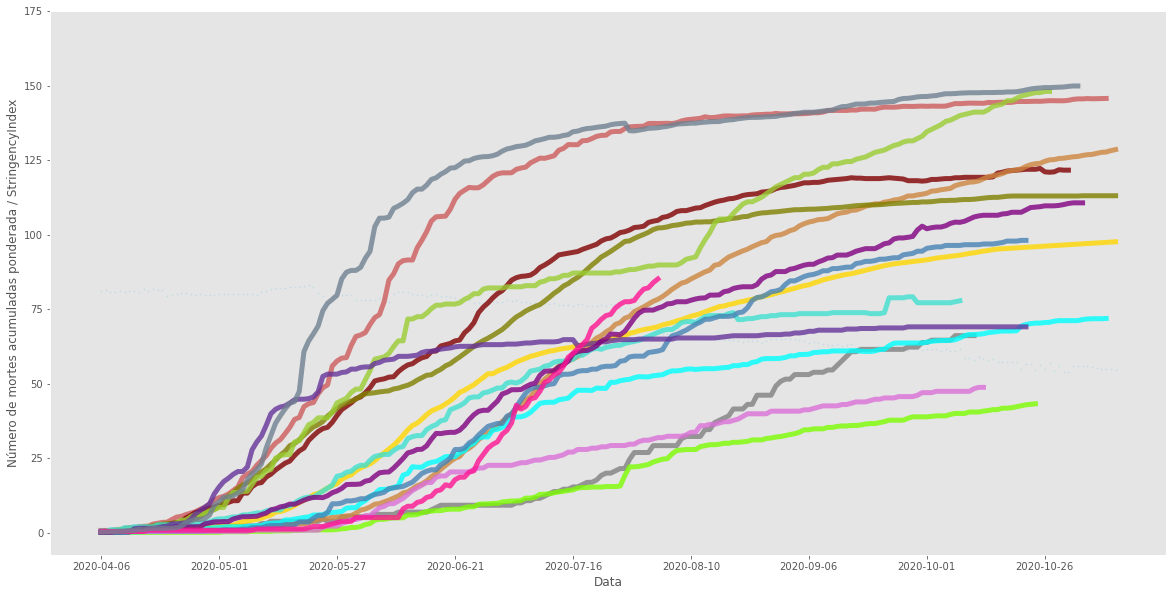

In [21]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

count = 0

df0strin = df0.groupby(['FormattedDate'])['StringencyIndex'].mean().to_frame().reset_index()

for i in df0['CityName'].unique():
    #df0.loc[df['CityName'] == i].plot(ax=ax, kind='line', x='FormattedDate', y='StringencyIndex', alpha=0.5, linestyle='dotted', color=color[count])
    df0.loc[df['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[count]) #secondary_y=True
    count+=1
    print(i + ':' + color[count])

df0strin.plot(ax=ax, kind='scatter', x='FormattedDate', y='StringencyIndex', alpha=0.5,s=1.5, color='lightblue', secondary_y=True)




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada / StringencyIndex')
ax.set_yticks(range(0,200,25))

Vitoria:indianred
Belo Horizonte:maroon
Sao Paulo:peru
Curitiba:gold
Florianopolis:olive
Porto Alegre:yellowgreen
Rio de Janeiro:lawngreen
Brasilia:turquoise


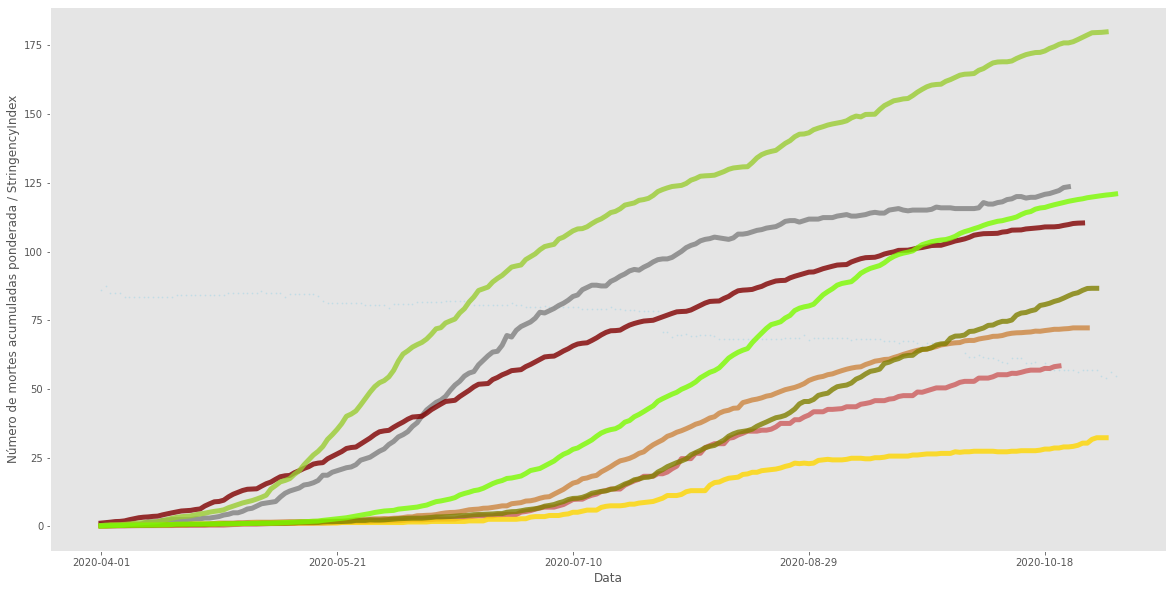

In [22]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

count = 0

df1strin = df1.groupby(['FormattedDate'])['StringencyIndex'].mean().to_frame().reset_index()

for i in df1['CityName'].unique():
    #df1.loc[df['CityName'] == i].plot(ax=ax, kind='line', x='FormattedDate', y='StringencyIndex', alpha=0.5, linestyle='dotted', color=color[count])
    df1.loc[df['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[count]) #secondary_y=True
    count+=1
    print(i + ':' + color[count])

df1strin.plot(ax=ax, kind='scatter', x='FormattedDate', y='StringencyIndex', alpha=0.5,s=1.5, color='lightblue', secondary_y=True)




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada / StringencyIndex')
ax.set_yticks(range(0,200,25))

Cruzeiro do Sul:indianred
Parintins:maroon
Rorainopolis:peru
Laranjal do Jari:gold


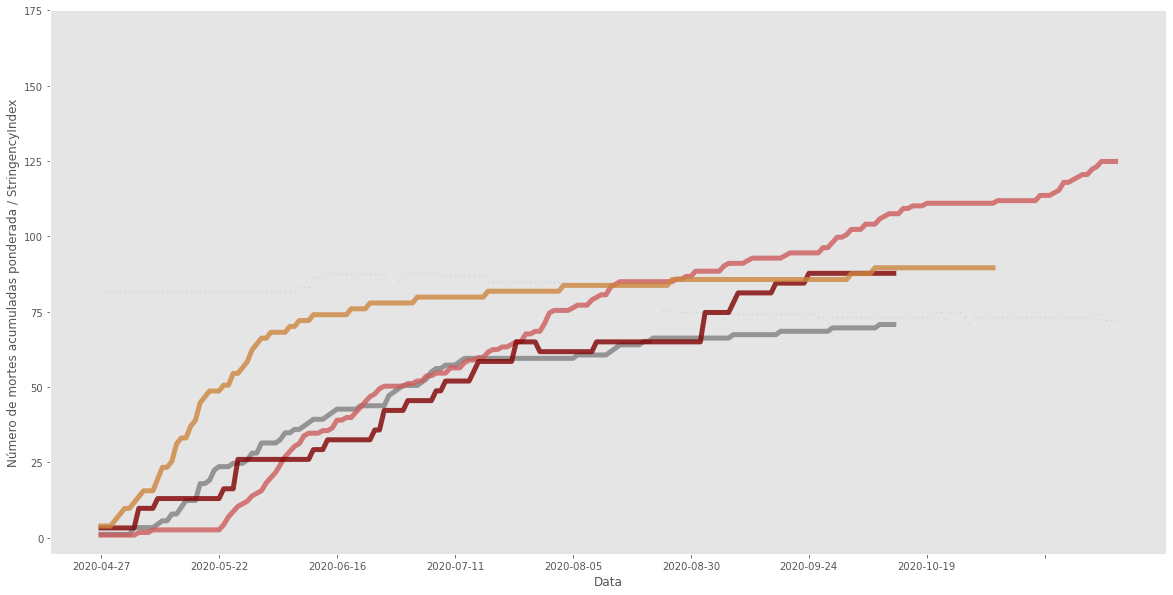

In [23]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

count = 0

df2strin = df2.groupby(['FormattedDate'])['StringencyIndex'].mean().to_frame().reset_index()

for i in df2['CityName'].unique():
    #df2.loc[df['CityName'] == i].plot(ax=ax, kind='line', x='FormattedDate', y='StringencyIndex', alpha=0.5, linestyle='dotted', color=color[count])
    df2.loc[df['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[count]) #secondary_y=True
    count+=1
    print(i + ':' + color[count])

df2strin.plot(ax=ax, kind='scatter', x='FormattedDate', y='StringencyIndex', alpha=0.5,s=1.5, color='lightblue', secondary_y=True)




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada / StringencyIndex')
ax.set_yticks(range(0,200,25))

Santarem:indianred
Caucaia:maroon
Arapiraca:peru
Parnaiba:gold
Lagarto:olive


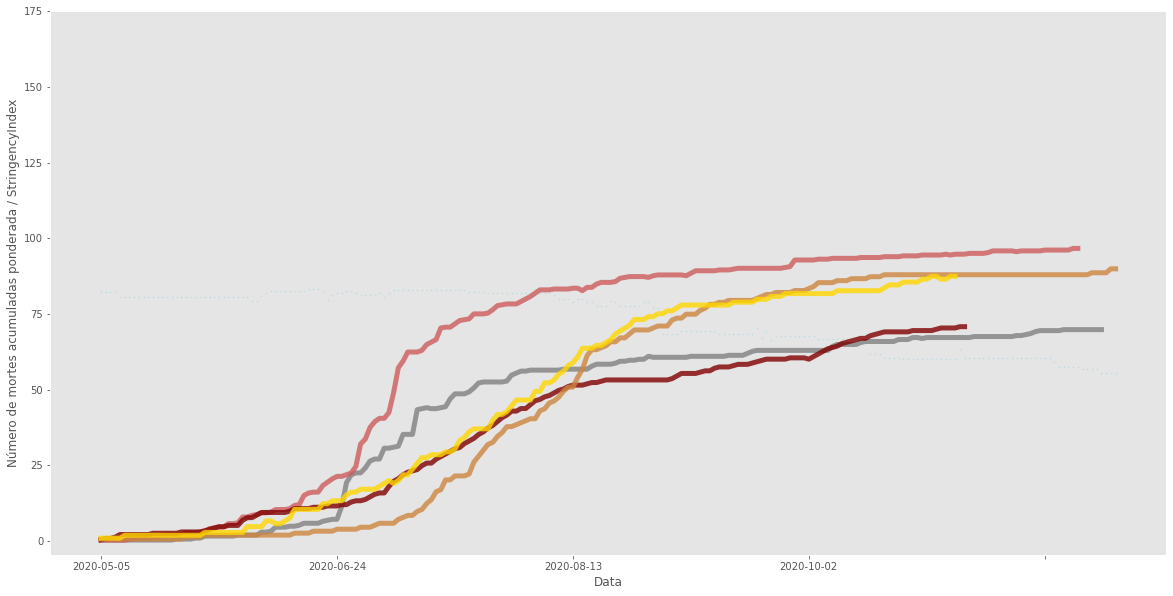

In [24]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

count = 0

df3strin = df3.groupby(['FormattedDate'])['StringencyIndex'].mean().to_frame().reset_index()

for i in df3['CityName'].unique():
    #df3.loc[df['CityName'] == i].plot(ax=ax, kind='line', x='FormattedDate', y='StringencyIndex', alpha=0.5, linestyle='dotted', color=color[count])
    df3.loc[df['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[count]) #secondary_y=True
    count+=1
    print(i + ':' + color[count])

df3strin.plot(ax=ax, kind='scatter', x='FormattedDate', y='StringencyIndex', alpha=0.5,s=1.5, color='lightblue', secondary_y=True)




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada / StringencyIndex')
ax.set_yticks(range(0,200,25))

Cuiaba:indianred
Campo Grande:maroon
Caxias do Sul:peru
Joinville:gold
Londrina:olive
Joao Pessoa:yellowgreen
Vila Velha:lawngreen
Uberlandia:turquoise
Salvador:cyan
Aracaju:steelblue
Goiania:rebeccapurple
Natal:purple
Recife:orchid


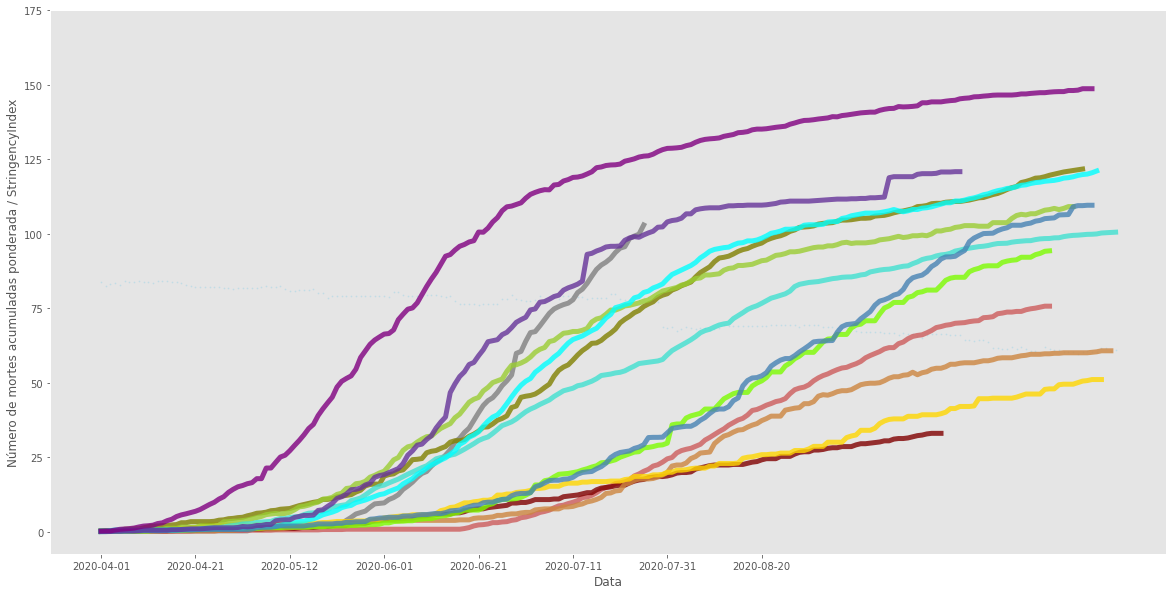

In [25]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

count = 0

df4strin = df4.groupby(['FormattedDate'])['StringencyIndex'].mean().to_frame().reset_index()

for i in df4['CityName'].unique():
    #df4.loc[df['CityName'] == i].plot(ax=ax, kind='line', x='FormattedDate', y='StringencyIndex', alpha=0.5, linestyle='dotted', color=color[count])
    df4.loc[df['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[count]) #secondary_y=True
    count+=1
    print(i + ':' + color[count])

df4strin.plot(ax=ax, kind='scatter', x='FormattedDate', y='StringencyIndex', alpha=0.5,s=1.5, color='lightblue', secondary_y=True)




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada / StringencyIndex')
ax.set_yticks(range(0,200,25))

Macapa:indianred
Boa Vista:maroon
Manaus:peru
Araguaina:gold
Rio Branco:olive
Palmas:yellowgreen
Porto Velho:lawngreen
Aparecida de Goiania:turquoise


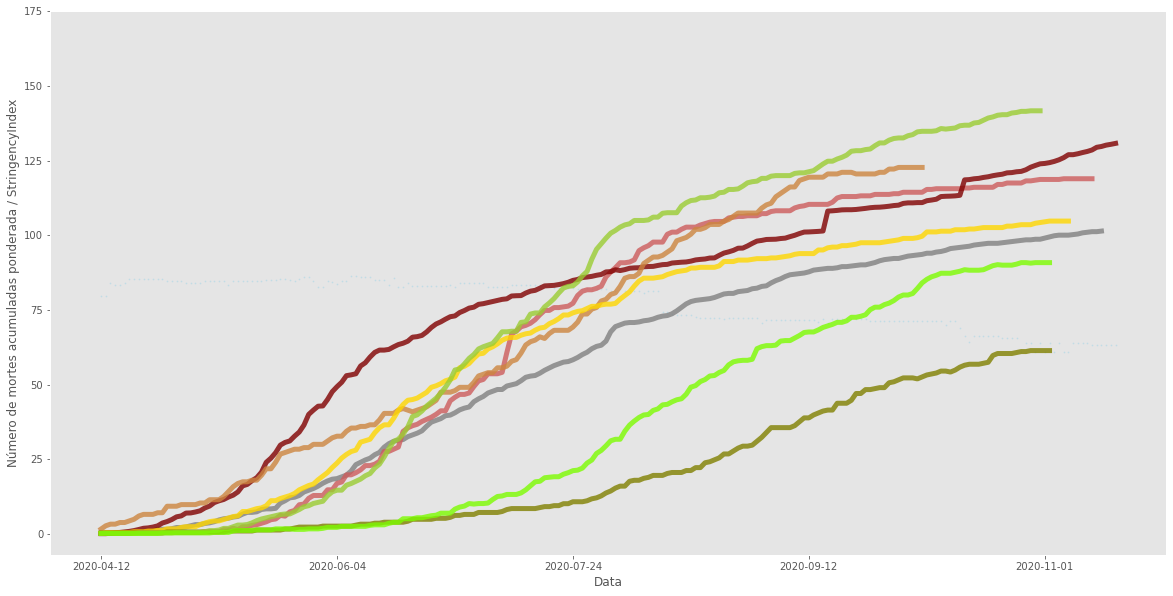

In [26]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

count = 0

df5strin = df5.groupby(['FormattedDate'])['StringencyIndex'].mean().to_frame().reset_index()

for i in df5['CityName'].unique():
    #df5.loc[df['CityName'] == i].plot(ax=ax, kind='line', x='FormattedDate', y='StringencyIndex', alpha=0.5, linestyle='dotted', color=color[count])
    df5.loc[df['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[count]) #secondary_y=True
    count+=1
    print(i + ':' + color[count])

df5strin.plot(ax=ax, kind='scatter', x='FormattedDate', y='StringencyIndex', alpha=0.5,s=1.5, color='lightblue', secondary_y=True)




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada / StringencyIndex')
ax.set_yticks(range(0,200,25))

# agora printar todos os grupos juntos, mas cada grupo é uma cor

In [36]:
color=['red', 'green','blue','fuchsia','gray','black']
linetype = ['dotted', 'solid', 'dashed','dashdot','solid', 'dashdot']

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

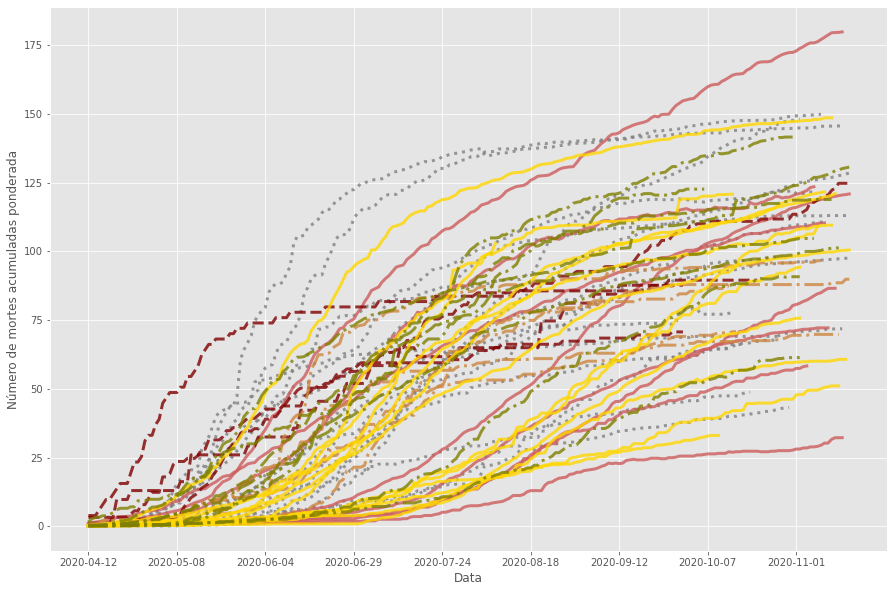

In [35]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    for i in dfs[group]['CityName'].unique():
        dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=3, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.8, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')

# Printar isso seis vezes ressaltando um grupo por vez

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

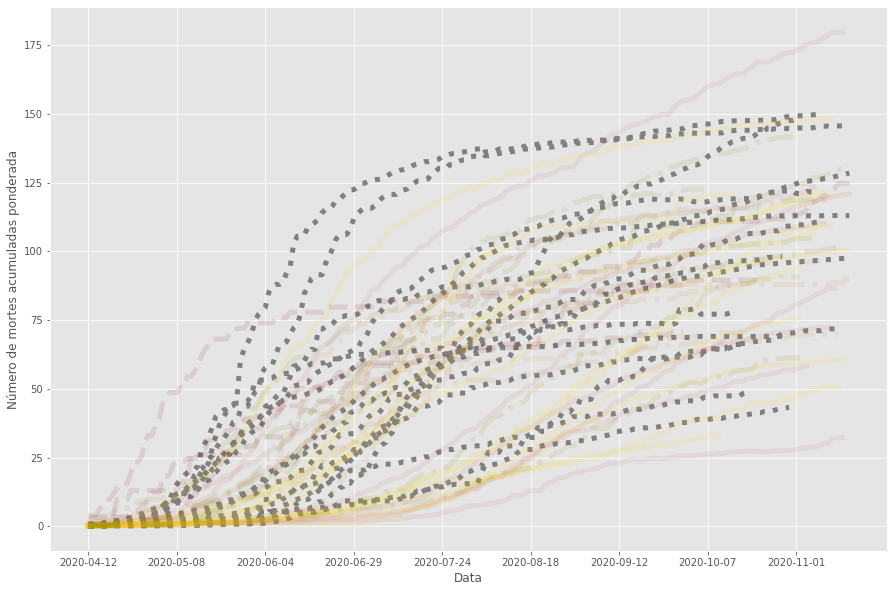

In [29]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    if group == 0:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=1, color=color[group],linestyle=linetype[group])
    else:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.1, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

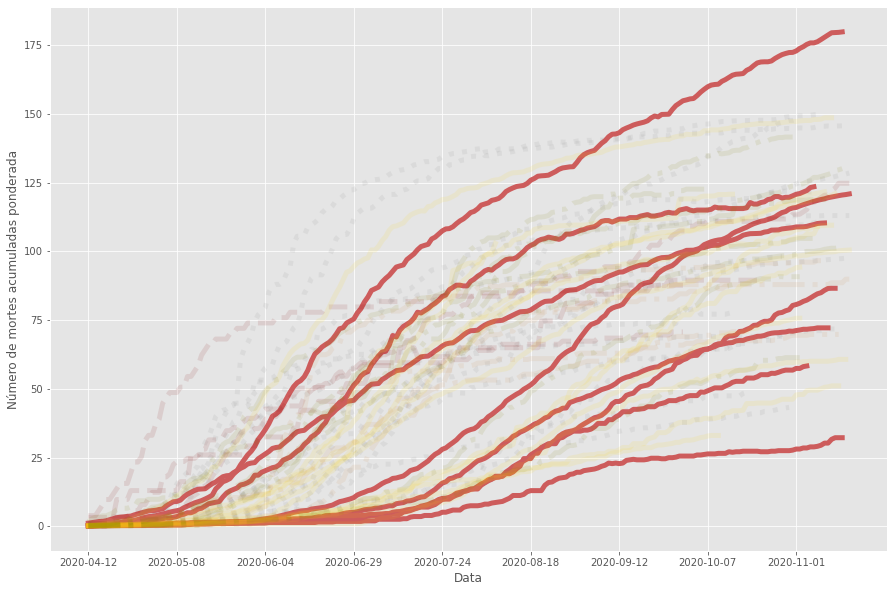

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    if group == 1:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=1, color=color[group])
    else:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.1, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

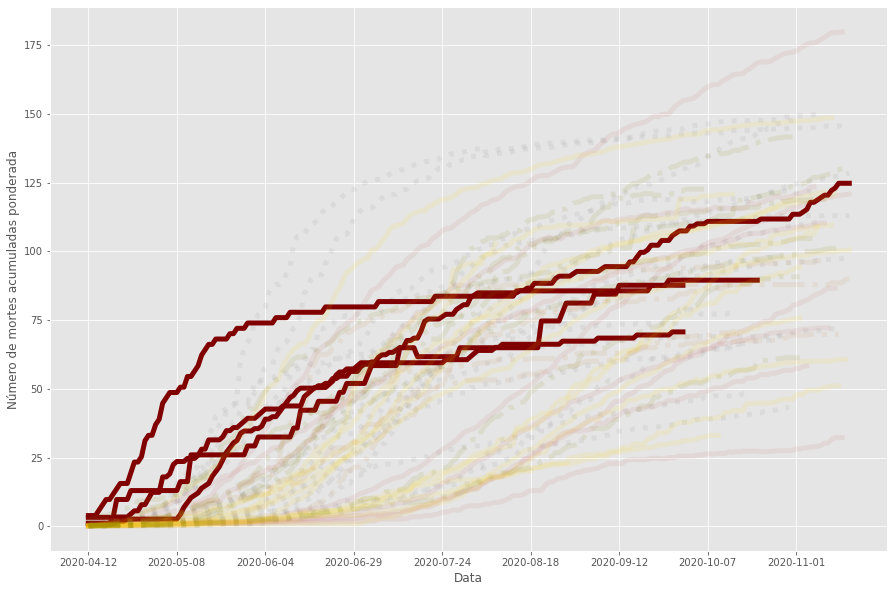

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    if group == 2:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=1, color=color[group])
    else:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.1, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

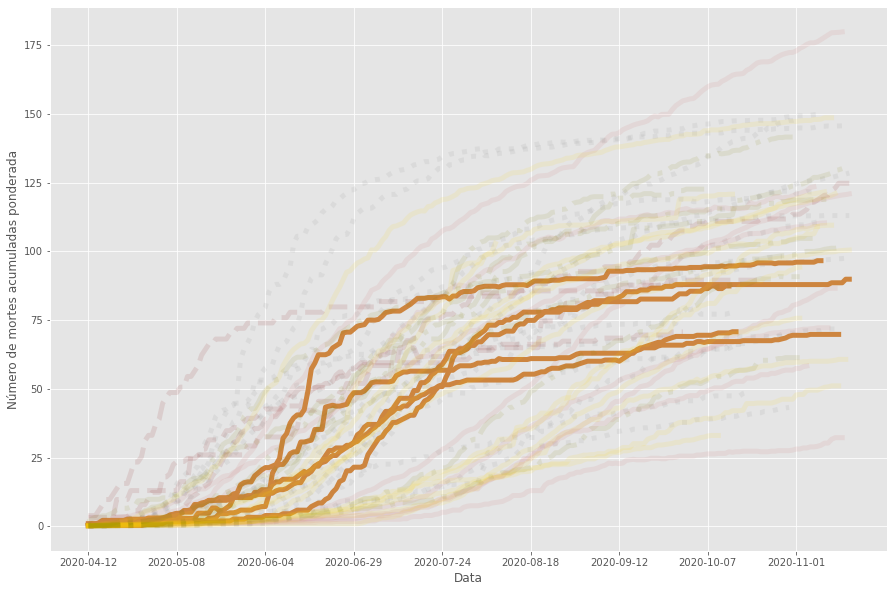

In [32]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    if group == 3:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=1, color=color[group])
    else:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.1, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

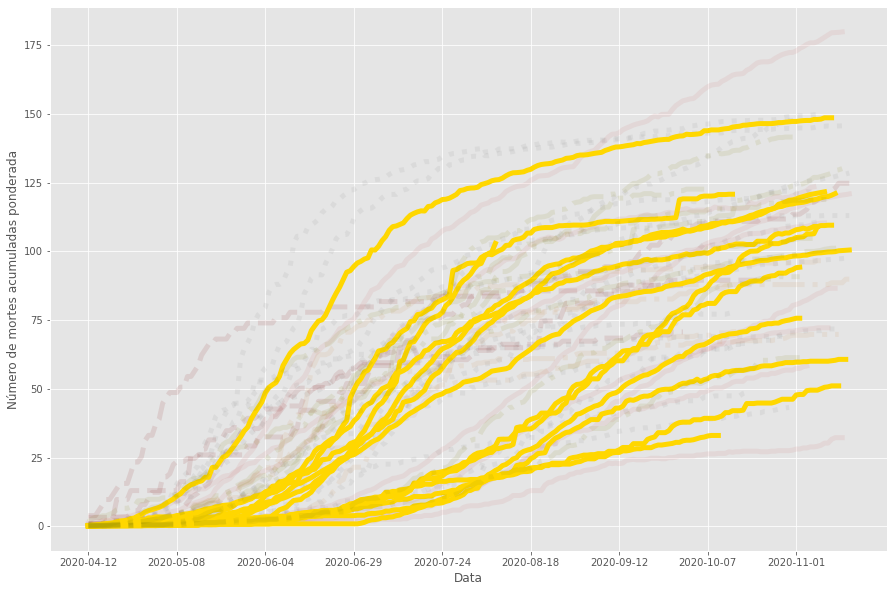

In [33]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    if group == 4:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=1, color=color[group])
    else:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.1, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')

Text(0, 0.5, 'Número de mortes acumuladas ponderada')

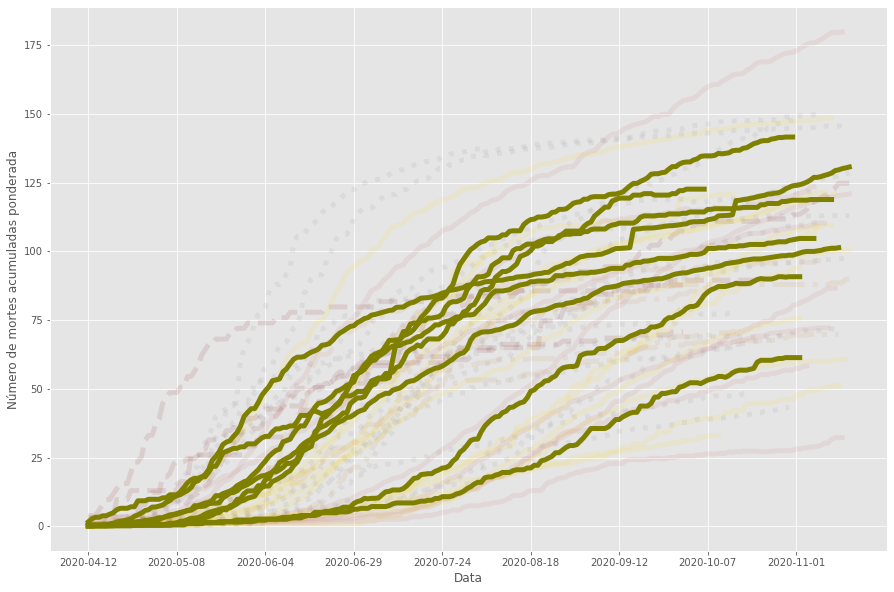

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15,10))

dfs = [df0,df1,df2,df3,df4,df5]

for group in range(6):

    if group == 5:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=1, color=color[group])
    else:
        for i in dfs[group]['CityName'].unique():
            dfs[group].loc[dfs[group]['CityName'] == i].plot(legend=None, ax=ax, linewidth=5, kind='line', x='FormattedDate', y='ConfirmedDeathsPonderado100k', alpha=0.1, color=color[group],linestyle=linetype[group])




ax.set_xlabel('Data')
ax.set_ylabel('Número de mortes acumuladas ponderada')